In [2]:
import geopandas as geop
from visualize import Visualize, wangjing, w_zgc

In [3]:
raw_data = geop.read_file('planblocksR5_v3/planblocksR5_v3.shp')

In [4]:
base_raw = raw_data.assign(Far_2004=lambda x: x.Far_2017)

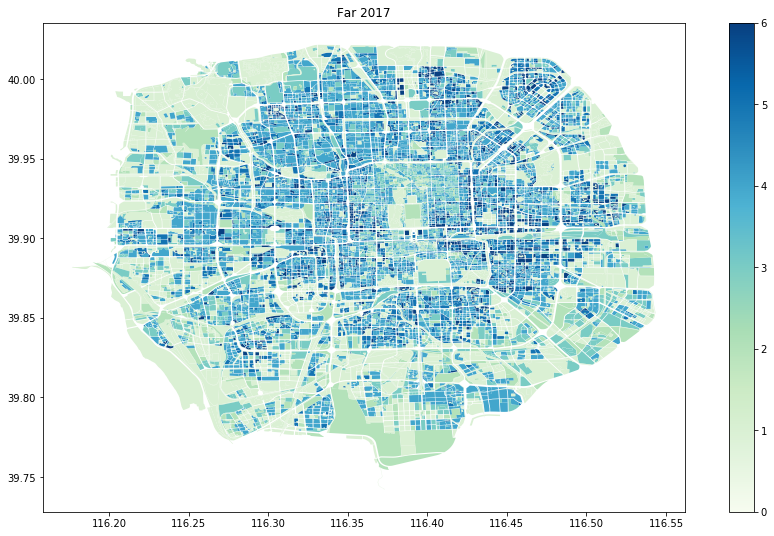

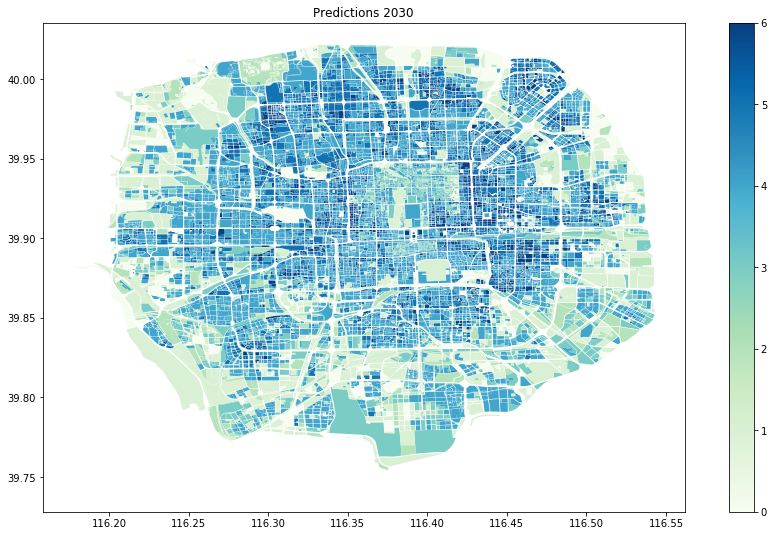

In [5]:
## Normal 2030
v_normal = Visualize('neisum', raw_data=base_raw)
v_normal.plot_district(None, colname='lvl_truth', vmin=0, vmax=6, cmap='GnBu', title='Far 2017')
v_normal.plot_district(None, colname='lvl_preds', vmin=0, vmax=6, cmap='GnBu', title='Predictions 2030')


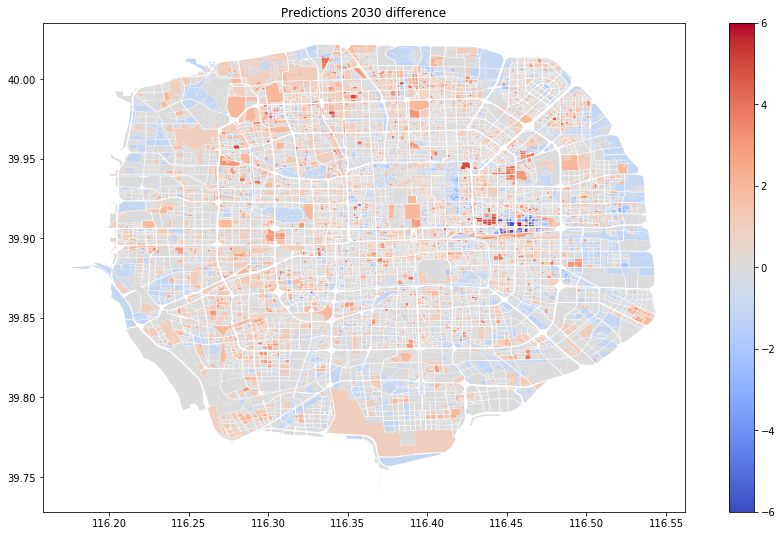

In [7]:
v_normal.df = v_normal.df.assign(lvl_diff=lambda x: x.lvl_preds - x.lvl_truth)
v_normal.plot_district(None, colname='lvl_diff',
                       title='Predictions 2030 difference')

In [14]:
import numpy as np

In [46]:
## Decenturalize
rings = np.array(base_raw['r5id'])
new_in_his = (((rings < 4) + (np.array(base_raw['in_His']))) > 0).astype(float)
newhis = base_raw.join(geop.GeoDataFrame({'new_in_His': new_in_his})).assign(in_His=lambda x: x.new_in_His)

v_newhis = Visualize('neisum', raw_data=newhis)

# v_newhis.plot_district(None, colname='in_His', vmin=0, vmax=1, cmap='GnBu', title='New Historical Protection')
# v_newhis.plot_district(None, colname='lvl_preds', vmin=0, vmax=6, cmap='GnBu', title='Predictions 2030 with new history protection area')

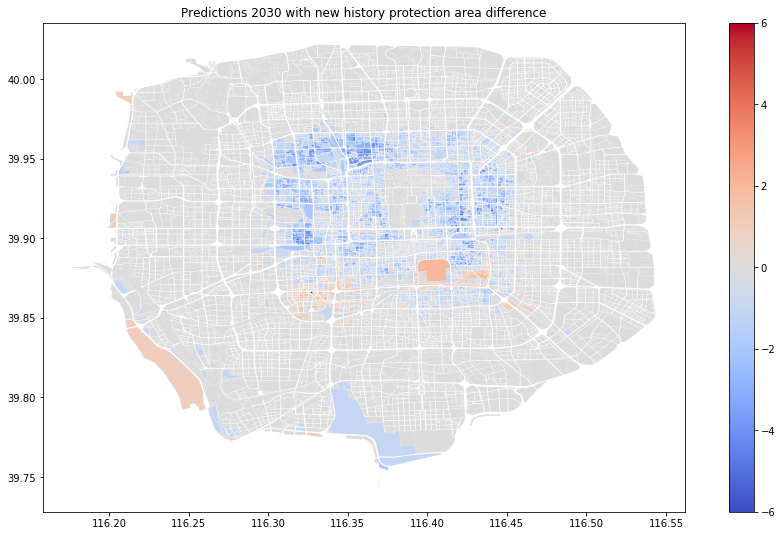

In [47]:
v_newhis.df = v_newhis.df.join(geop.GeoDataFrame({'lvl_orig': np.array(v_normal.df['lvl_preds'])}))
v_newhis.df = v_newhis.df.assign(lvl_diff=lambda x: x.lvl_preds - x.lvl_orig)
v_newhis.plot_district(None, colname='lvl_diff',
                       title='Predictions 2030 with new history protection area difference')

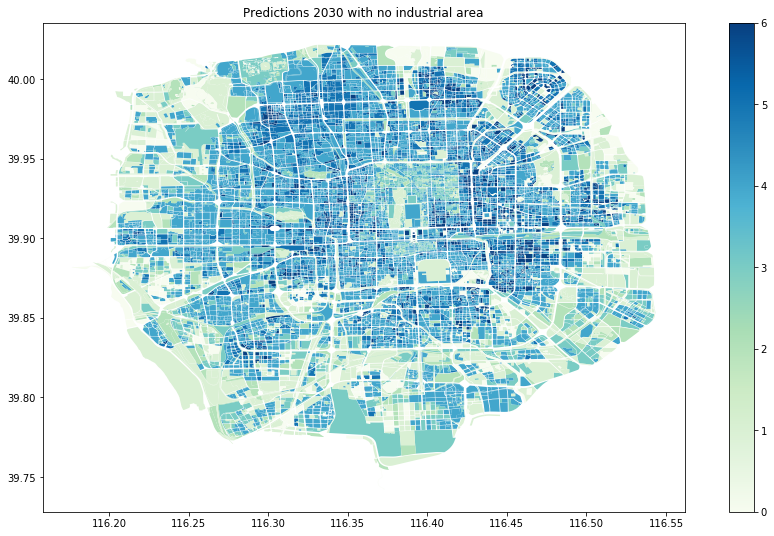

In [26]:
## No industry
noind = base_raw.assign(in_Ind=lambda x: 0.)
v_noind = Visualize('neisum', raw_data=noind)

v_noind.plot_district(None, colname='lvl_preds', vmin=0, vmax=6, cmap='GnBu', title='Predictions 2030 with no industrial area')


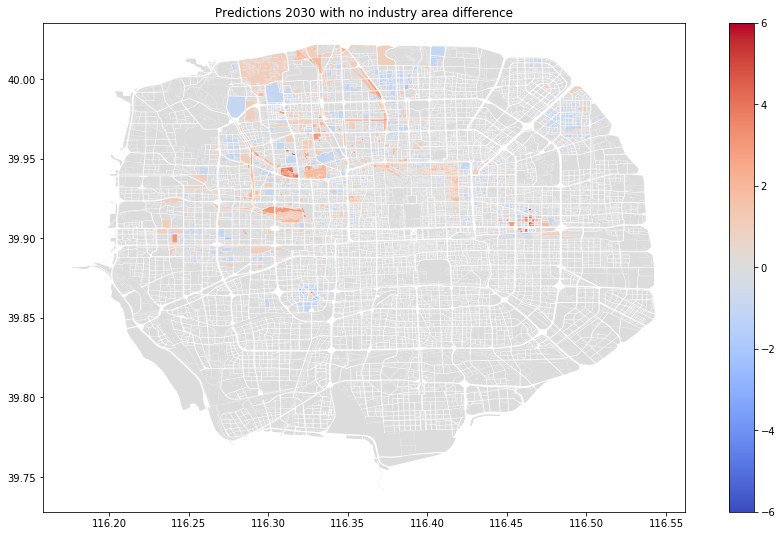

In [48]:
v_noind.df = v_noind.df.join(geop.GeoDataFrame({'lvl_orig': np.array(v_normal.df['lvl_preds'])}))
v_noind.df = v_noind.df.assign(lvl_diff=lambda x: x.lvl_preds - x.lvl_orig)
v_noind.plot_district(None, colname='lvl_diff',
                       title='Predictions 2030 with no industry area difference')

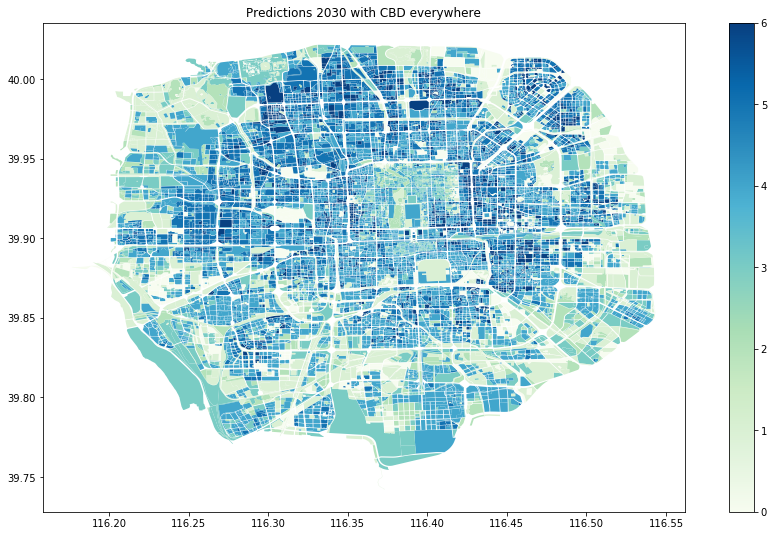

In [27]:
## CBD Everywhere 
allcbd = base_raw.assign(d_cbd=lambda x: 1e-10)
v_allcbd = Visualize('neisum', raw_data=allcbd)

v_allcbd.plot_district(None, colname='lvl_preds', vmin=0, vmax=6, cmap='GnBu', title='Predictions 2030 with CBD everywhere')


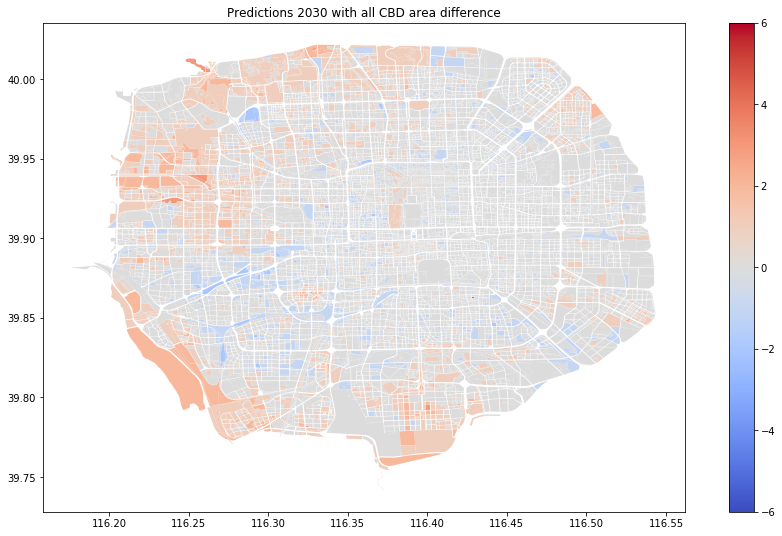

In [54]:
v_allcbd.df = v_allcbd.df.join(geop.GeoDataFrame({'lvl_orig': np.array(v_normal.df['lvl_preds'])}))
v_allcbd.df = v_allcbd.df.assign(lvl_diff=lambda x: x.lvl_preds - x.lvl_orig)
v_allcbd.plot_district(None, colname='lvl_diff',
                       title='Predictions 2030 with all CBD area difference')


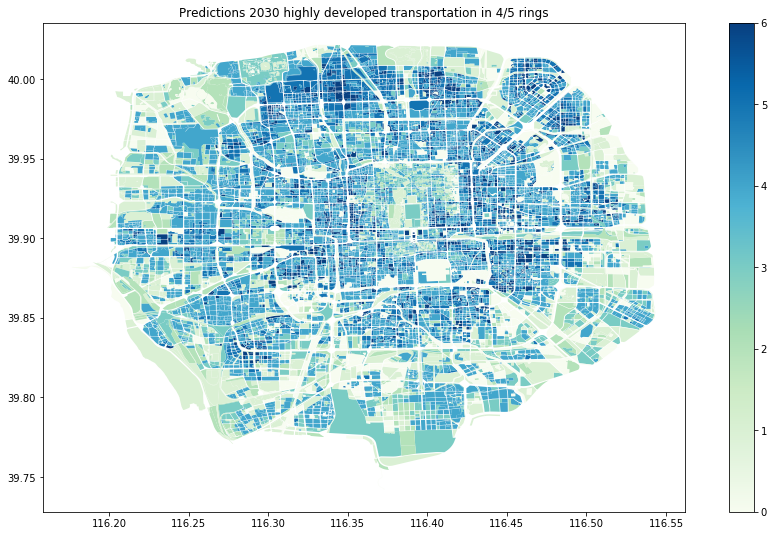

In [55]:
## Decenturalize
ds = np.array(base_raw[['r5id', 'd_metro', 'Den_road']])
new_d_metro = [x[1] * .1 if x[0] == 5 else x[1] for x in ds]
new_den_road = [x[2] * 10. if x[0] == 5 else x[2] for x in ds]
newden = base_raw.join(geop.GeoDataFrame({
    'new_d_metro': new_d_metro,
    'new_den_road': new_den_road
}))
newden = newden.assign(d_metro=lambda x: x.new_d_metro)
newden = newden.assign(Den_road=lambda x: x.new_den_road)

v_newd = Visualize('neisum', raw_data=newden)

v_newd.plot_district(None, colname='lvl_preds', vmin=0, vmax=6, cmap='GnBu', 
                     title='Predictions 2030 highly developed transportation in 4/5 rings')

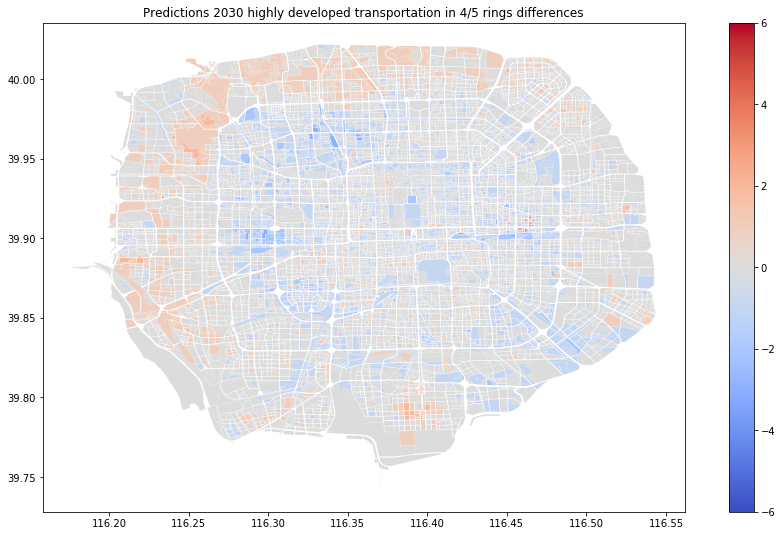

In [56]:
v_newd.df = v_newd.df.join(geop.GeoDataFrame({'lvl_orig': np.array(v_normal.df['lvl_preds'])}))
v_newd.df = v_newd.df.assign(lvl_diff=lambda x: x.lvl_preds - x.lvl_orig)
v_newd.plot_district(None, colname='lvl_diff',
                       title='Predictions 2030 highly developed transportation in 4/5 rings differences')
